# Assignment 5: Clustering

## Table of Contents:
[Part 1: Data Processing](#Part-1:-Data-Preprocessing)

[Part 2: Agglomerative Clustering](#Part-2:-Agglomerative-Clustering) 

[Part 3: Divisive Clustering](#Part-3:-Divisive-Clustering) 

This assignment works with the FiveThirtyEight Airline Safety Dataset: https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-airline-safety-dataset?resource=download

#### Features included

- airline: Airline (asterisk indicates that regional subsidiaries are included)

- avail_seat_km_per_week: Available seat kilometers flew every week

- incidents_85_99: Total number of incidents, 1985–1999

- fatal_accidents_85_99: Total number of fatal accidents, 1985–1999

- fatalities_85_99: Total number of fatalities, 1985–1999

- incidents_00_14: Total number of incidents, 2000–2014

- fatal_accidents_00_14: Total number of fatal accidents, 2000–2014

- fatalities_00_14: Total number of fatalities, 2000–2014

### Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.cluster import FeatureAgglomeration
from sklearn import cluster

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

# Part 1: Data Processing

In [4]:
safety_df = pd.read_csv('airline-safety.csv')
safety_df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [5]:
safety_df.shape

(56, 8)

In [6]:
safety_df.isnull().any()

airline                   False
avail_seat_km_per_week    False
incidents_85_99           False
fatal_accidents_85_99     False
fatalities_85_99          False
incidents_00_14           False
fatal_accidents_00_14     False
fatalities_00_14          False
dtype: bool

In [8]:
safety_df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [12]:
#examine outlier in 00-14 fatalities col
safety_df.iloc[safety_df['fatalities_00_14'].idxmax()]

airline                   Malaysia Airlines
avail_seat_km_per_week           1039171244
incidents_85_99                           3
fatal_accidents_85_99                     1
fatalities_85_99                         34
incidents_00_14                           3
fatal_accidents_00_14                     2
fatalities_00_14                        537
Name: 34, dtype: object

In [13]:
#examine outlier in 85-99 fatalities col
safety_df.iloc[safety_df['fatalities_85_99'].idxmax()]

airline                   China Airlines
avail_seat_km_per_week         813216487
incidents_85_99                       12
fatal_accidents_85_99                  6
fatalities_85_99                     535
incidents_00_14                        2
fatal_accidents_00_14                  1
fatalities_00_14                     225
Name: 16, dtype: object

In [17]:
safety_df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

# Part 2: Agglomerative Clustering

In [93]:
#initializing clustering
ag_clustering = AgglomerativeClustering()

#set X w/all features
X = safety_df[['avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14']]

#fit model
safety_agclustered = ag_clustering.fit_predict(X)

#check 1d array where elements represent the cluster label assigned to data points
print(safety_agclustered)
print(len(safety_agclustered))

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
56


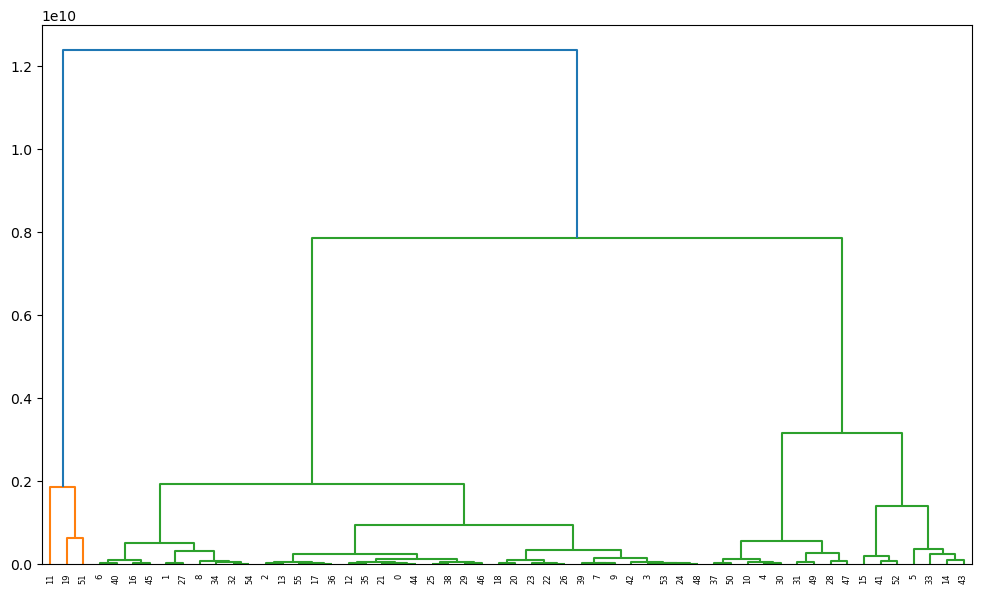

In [102]:
#create linkage matrix for plot
linkage_matrix = linkage(X, method = 'ward')

#settings
plt.figure(figsize=(12,7))

#plot dendrogram
dendrogram(linkage_matrix)
plt.show()

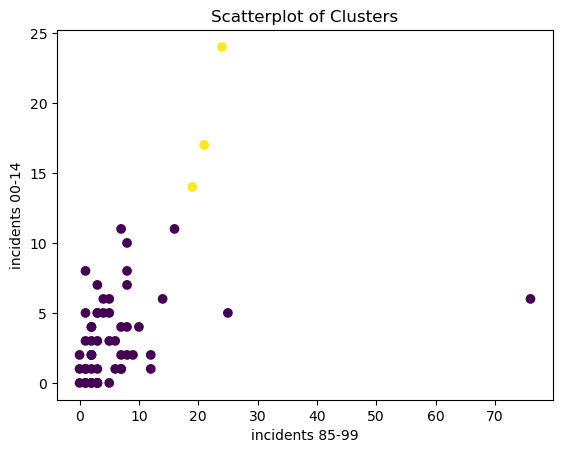

In [101]:
plt.scatter(X.iloc[:,1], X.iloc[:,4], c=safety_agclustered)
plt.xlabel('incidents 85-99')
plt.ylabel('incidents 00-14')
plt.title('Scatterplot of Clusters')
plt.show()

In [64]:
#decided to apply feature agglomeration because the fatalities are correlation to fatal accidents, 
#meaning there is some correlation that could affect the clustering

agglomerated_features = FeatureAgglomeration(n_clusters = 4)

reduced_X = agglomerated_features.fit_transform(X)

#check rows remain same, but columns are reduced
reduced_X.shape

(56, 4)

In [69]:
#fit model
ag_clustering.fit_predict(reduced_X)

cluster_labels = ag_clustering.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [122]:
#check final number of clusters
print(len(np.unique(cluster_labels)))

2


In [81]:
adjusted_rand_score(safety_agclustered, cluster_labels)

1.0

In [77]:
og_score = silhouette_score(X, safety_agclustered)
agfeature_score = silhouette_score(reduced_X, cluster_labels)

In [78]:
og_score == agfeature_score

True

In [79]:
print(og_score)

0.7945414228917096


I calculated the adjusted rand score for to evaluate how the agglomerated feature clustering did compared to the first clustering with all expanded features and sice this yielded a score of 1, I decided to calculate their silhouette scores and see if they were the same.

Unsurprisingly, the reduced feature space had the exact same silhouette score as the first clustering model, which indicates that it captured the underlying structure of this data in the same way the original did. I first examined the silhouette score as the coefficient is calculated by using the mean intracluster distance and the mean nearest-cluster distance for each sample, and it summarizes the average of the silhouette scores of all the data points. 

Since the score itself is rather close to 1, it seems the clusters created are fairly distinct and don't have much overlap. 

In [165]:
#davies bouldin score for agglomerative clustering
agglomerative_db = davies_bouldin_score(X, safety_agclustered)
agglomerative_db

0.27341811842594077

I decided to calculate the Davies Bouldin score to measure the similarity of each cluster with their most similar clusters. The low score of 0.27 indicates that there is good clustering.

# Part 3: Divisive Clustering

In [155]:
#initialize kmeans
kmeans = KMeans(n_init='auto')

#fit model with fit_predict to immediately assign labels to data points
kmeans_clustering = kmeans.fit_predict(X)
clustering_labels =kmeans.labels_

#check final number of clusters
unique_clusters = np.unique(clustering_labels)

print(unique_clusters)

[0 1 2 3 4 5 6 7]


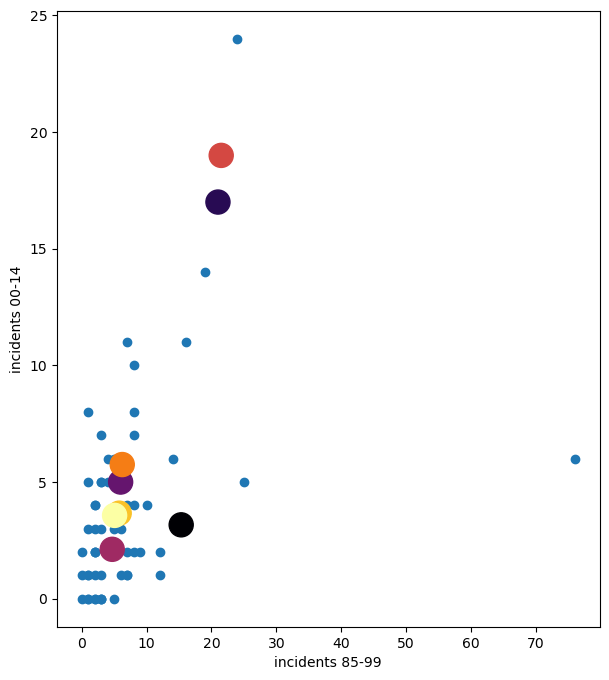

In [156]:
#plot clusters

plt.figure(figsize=(7,8))

#feature at index 1: incidents 85-99, index 4: incidents 00-14
plt.scatter(X.iloc[:,1], X.iloc[:,4])
plt.xlabel('incidents 85-99')
plt.ylabel('incidents 00-14')

#add cluster centers
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,4], s=300, c = unique_clusters, 
            cmap = 'inferno')
plt.show()

In [181]:
kmeans_silhouette = silhouette_score(X, kmeans_clustering)
kmeans_silhouette

0.6155761513356978

There are significant differences between the resulting clusters in the agglomerative and divisive kmeans clustering approaches. The former has a default value of 2 resulting clusters while the latter's default is 8, therefore the resulting 6 clusters in the second kmeans approach aren't surprising. To make the comparisons fair between the approaches as far as number of clusters, I decided to refit my kmeans with a default of 2 below to also see how it compard to its initial result. 

In [172]:
#initialize kmeans
kmeans2 = KMeans(n_clusters = 2, n_init = 'auto')

#fit model with fit_predict to immediately assign labels to data points
kmeans_clustering2 = kmeans2.fit_predict(X)
clustering_labels2 =kmeans2.labels_

#check final number of clusters
unique_clusters2 = np.unique(clustering_labels2)

print(unique_clusters2)

kmeans2_silhouette = silhouette_score(X, kmeans_clustering2)
kmeans2_silhouette

[0 1]


0.7945414228917096

In [174]:
#compare second try with max 2 clusters
kmeans2_silhouette - kmeans_silhouette

0.17896527155601183

In [176]:
#compare agglomerative silhouette score to second kmeans score
og_score - kmeans2_silhouette

0.0

In [182]:
#compare agglomerative silhouette score to first kmeans score
og_score - kmeans_silhouette

0.17896527155601183

In [184]:
#calculate davies_bouldin score for second kmeans clustering
kmeans2_db = davies_bouldin_score(X, kmeans_clustering2)

kmeans2_db

0.27341811842594077

In [186]:
#calculate davies_bouldin score for first kmeans clustering
kmeans_db = davies_bouldin_score(X, kmeans_clustering)

kmeans_db

0.33084056673104223

In [185]:
#compare davies bouldin scores w second kmeans
kmeans2_db - agglomerative_db

0.0

In [187]:
#compare davies bouldin scores w first kmeans
kmeans_db - agglomerative_db

0.05742244830510146

The second run of KMeans with 2 cluster groups performed better than the first when comparing their silhouette scores by about 17%. This second run of KMeans clustering performed the same as the first agglomerative clustering fit in terms of both their silhouette and davies bouldin scores. This means that the first KMeans cluster results performed 17% worse than the agglomerative clustering, meaning that more clusters don't necessarily mean better grouping. Additionally, the more heavily clustered results performed about 5% worse compared to both the 2-cluster kmeans model and the agglomerative model. 

In [188]:
#calculate adjusted rand score to compare cluster assignments
adjusted_rand_score(safety_agclustered, clustering_labels2)

1.0

In [189]:
#calculate adjusted rand score to compare cluster assignments with the first kmeans 
adjusted_rand_score(safety_agclustered, clustering_labels)

0.051602317777061577

Naturally, the adjusted rand score for the 2-cluster kmeans model was 1.0 when comparing it to the agglomerative model. Considering the first kmeans model was more heavily segmented with 6 different clusters, the adjusted rand score of .05 is unsurprising as it indicates a significant difference between its clustering compared to the agglomerative model. This also means there is a significant difference between the first kmeans model and the second (because the second kmeans model performed the same as the first agglomerative model), which is again natural due to the lesser amount of resulting clusters. 